In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter
import pywt
%matplotlib inline

In [2]:
### Signal processing ###
def butter_bandpass(lowcut, highcut, fs, order=5):
 nyq = 0.5 * fs
 low = lowcut / nyq
 high = highcut / nyq
 b, a = butter(order, [low, high], btype='band')
 return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
   b, a = butter_bandpass(lowcut, highcut, fs, order=order)
   y = lfilter(b, a, data)
   return y


In [4]:
spike_freq = 100
syn_weight = 0.001
sim_label = 'POISSON-all_10000E-250I_20-120Hz_HS'
output_dir = '/home/kedoxey/CRCNS/PyramidalCellSimulations/models/NEURON/NMLCL000073-NEURON/output/POISSON-all'

with open(os.path.join(output_dir,f'{sim_label}_simData.pkl'),'rb') as fp:
    simData = pickle.load(fp)
with open(os.path.join(output_dir,f'{sim_label}_t.pkl'),'rb') as fp:
    t = pickle.load(fp)
with open(os.path.join(output_dir,f'{sim_label}_spkt.pkl'),'rb') as fp:
    spkt = pickle.load(fp)
# with open(os.path.join(output_dir,'lfp_bp_low.pkl'),'rb') as fp:
#     lfp_bp_low = pickle.load(fp)
# with open(os.path.join(output_dir,'lfp_bp_spikes.pkl'),'rb') as fp:
#     lfp_bp_spikes = pickle.load(fp)
t = np.array(t)

--No graphics will be displayed.


In [7]:
simData.keys()

dict_keys(['spkt', 'spkid', 'V_soma', 'V_syn', 't', 'LFP', '__dict__', 'head', '_repr_mimebundle_', '_repr_html_', '_repr_markdown_', '_repr_svg_', '_repr_png_', '_repr_pdf_', '_repr_jpeg_', '_repr_latex_', '_repr_json_', '_repr_javascript_'])

In [48]:
simData.keys()

dict_keys(['spkt', 'spkid', 'V_soma', 'V_syn', 't', 'LFP'])

In [49]:
simData['LFP'][:,0]

array([2.78180894e-06, 5.94093769e-06, 9.09297732e-06, ...,
       6.36803293e-04, 6.36660387e-04, 6.36517423e-04])

In [50]:
V_soma = np.array(simData['V_soma']['cell_0'])
t_spikes = t[np.where(V_soma>-10)]
t_spikes

array([ 748.5,  748.6,  748.7,  748.8,  760.9,  761. ,  761.1,  761.2,
        783.7,  783.8,  783.9,  784. ,  784.1,  887.3,  887.4,  887.5,
        887.6,  887.7, 1026.6, 1026.7, 1026.8, 1026.9, 1165.5, 1165.6,
       1165.7, 1165.8, 1298.4, 1298.5, 1298.6, 1298.7, 1427.3, 1427.4,
       1427.5, 1427.6, 1553.5, 1553.6, 1553.7, 1553.8, 1675.7, 1675.8,
       1675.9, 1676. , 1676.1, 1796.7, 1796.8, 1796.9, 1797. , 1917.4,
       1917.5, 1917.6, 1917.7, 2036.9, 2037. , 2037.1, 2037.2, 2154.7,
       2154.8, 2154.9, 2155. , 2271.9, 2272. , 2272.1, 2272.2, 2390.6,
       2390.7, 2390.8, 2390.9, 2391. , 2505.5, 2505.6, 2505.7, 2505.8,
       2505.9, 2624. , 2624.1, 2624.2, 2624.3, 2740.6, 2740.7, 2740.8,
       2740.9, 2915.6, 2915.7, 2915.8, 2915.9])

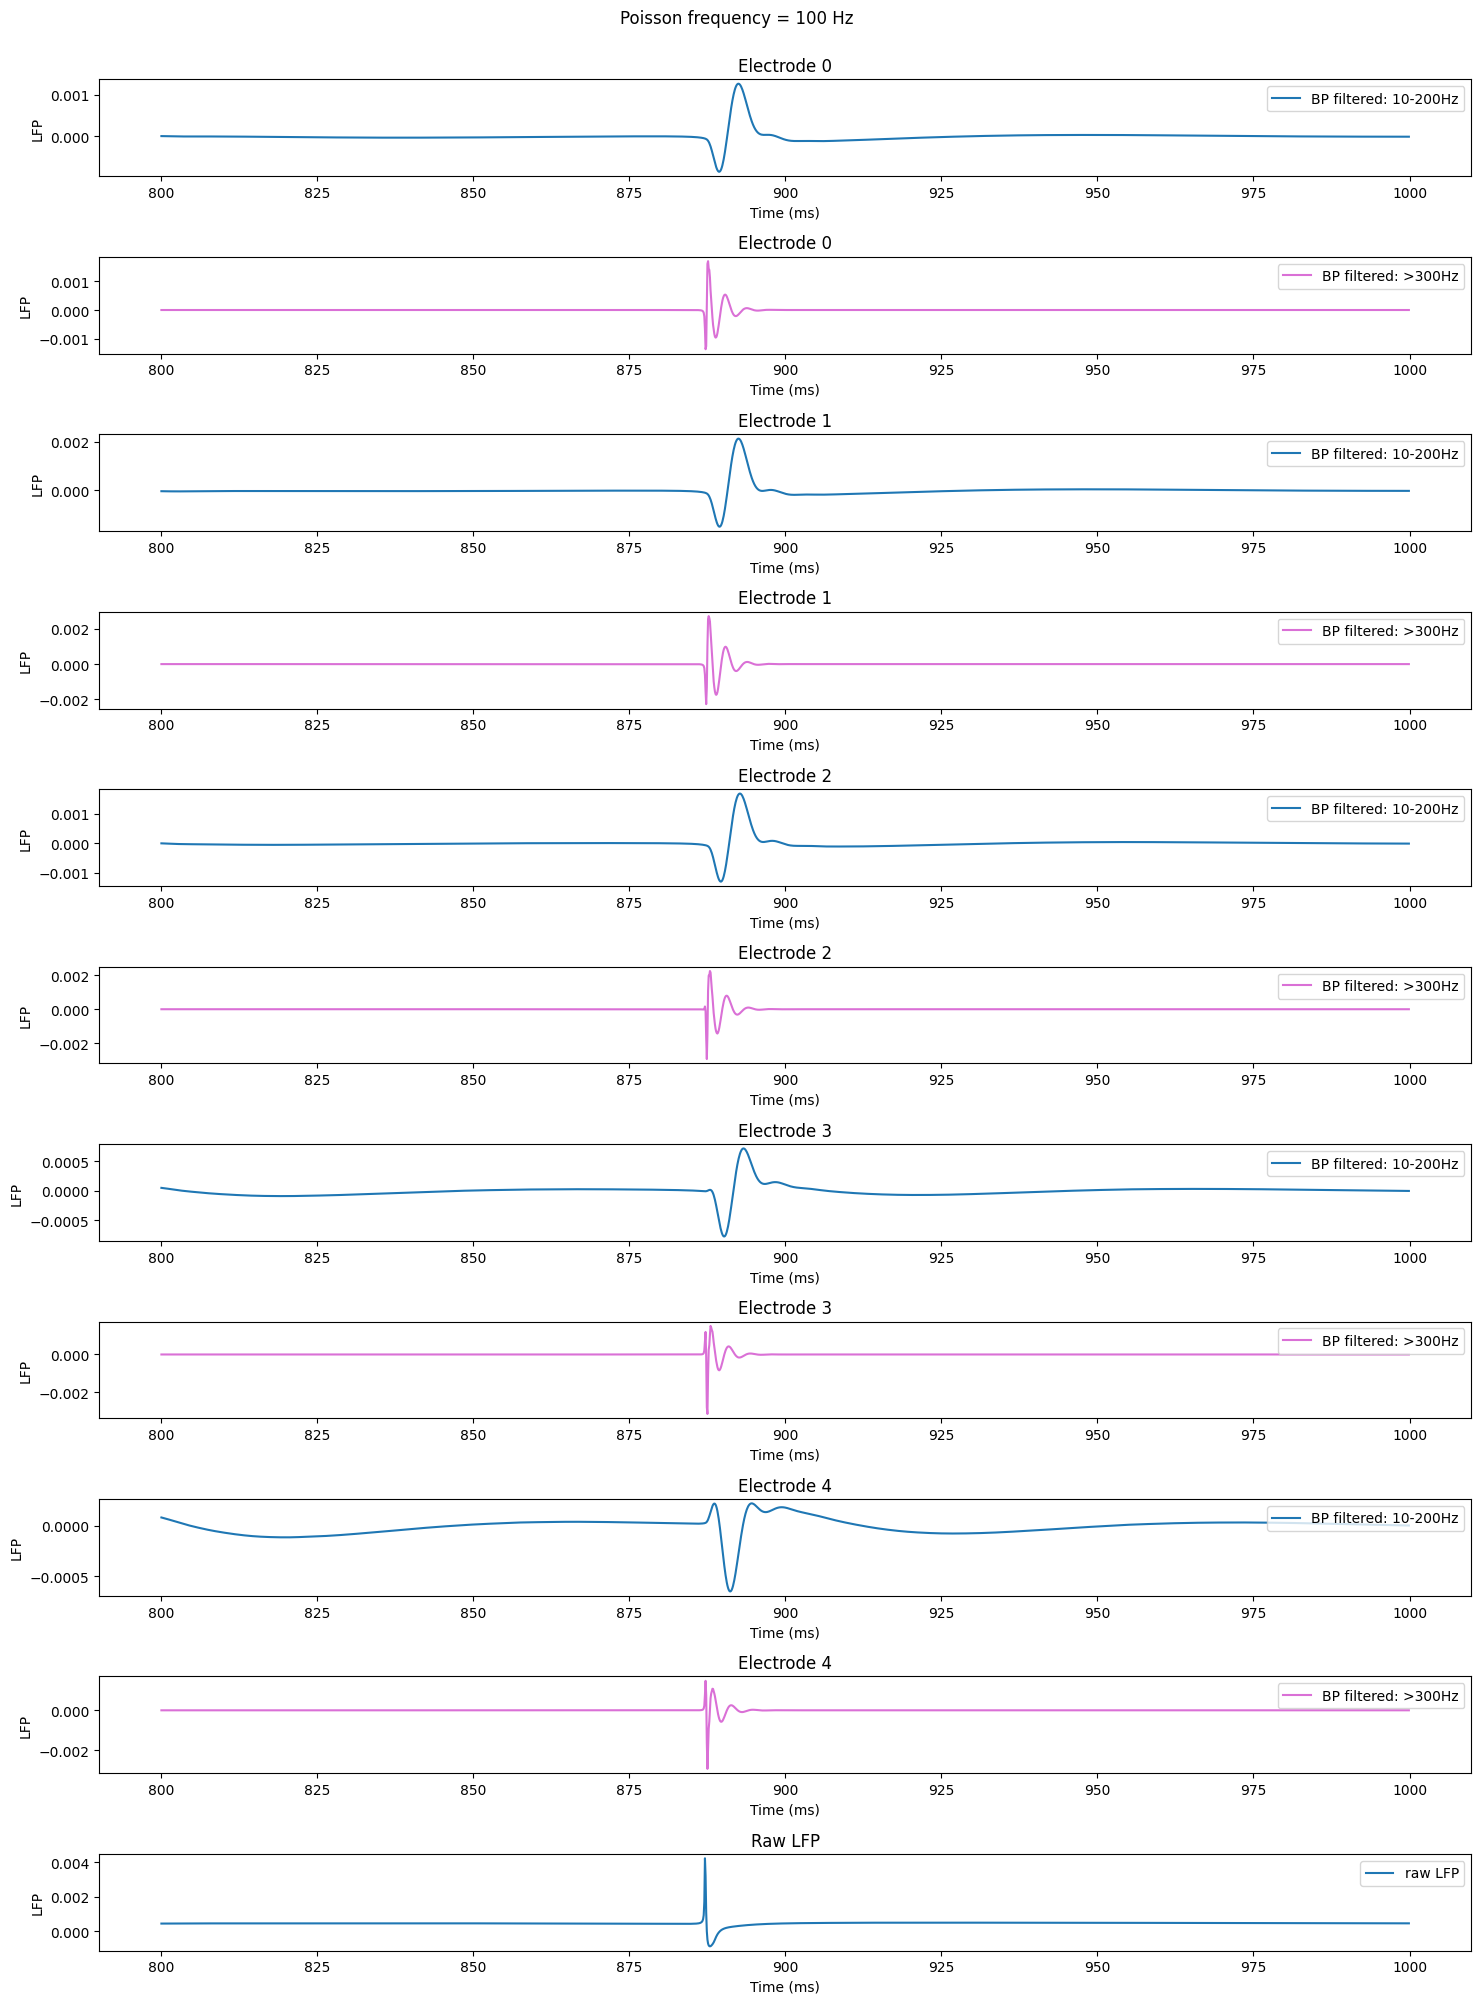

In [55]:
%matplotlib inline
t = list(simData['t'])
dt = 0.1
depths = 5

fig, axs = plt.subplots((depths*2)+1, 1, figsize=(15,20))
axs.ravel()

for i in range(0,depths):

    lfp = simData['LFP'][:,i]
    lfp_lims = [10,200]
    spike_lims = [300,3000]
    lfp_bp_low = butter_bandpass_filter(lfp, lfp_lims[0], lfp_lims[1], 1/dt*1000, order=4)
    lfp_bp_spikes = butter_bandpass_filter(lfp, spike_lims[0], spike_lims[1], 1/dt*1000, order=4)

    axs[i*2].plot(t[8000:10000],lfp_bp_low[8000:10000],label=f'BP filtered: {lfp_lims[0]}-{lfp_lims[1]}Hz')
    axs[i*2+1].plot(t[8000:10000],lfp_bp_spikes[8000:10000],color='orchid',label=f'BP filtered: >{spike_lims[0]}Hz')
    # axs[i*2].plot(t[0:len(lfp_bp_low)],lfp_bp_low,label=f'BP filtered: {lfp_lims[0]}-{lfp_lims[1]}Hz')
    # axs[i*2+1].plot(t[0:len(lfp_bp_spikes)],lfp_bp_spikes,color='orchid',label=f'BP filtered: >{spike_lims[0]}Hz')
    # ax[i].vlines(t_spikes, [35], [45], 'k')

    axs[i*2].set_title(f'Electrode {i}')
    axs[i*2+1].set_title(f'Electrode {i}')

axs[-1].plot(t[8000:10000],lfp[8000:10000],label='raw LFP')
# axs[-1].plot(t[0:len(lfp)],lfp,label='raw LFP')
axs[-1].set_title('Raw LFP')

for ax in axs:
    ax.legend(loc='upper right')     
    # ax[i].set_yticks([])
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('LFP') 

fig.suptitle(f'Poisson frequency = {spike_freq} Hz',y=1)
fig.tight_layout()
fig.savefig(os.path.join(output_dir,f'{sim_label}-LFP.png'),dpi=300)

# fig.suptitle('LFPs')

## Scratch

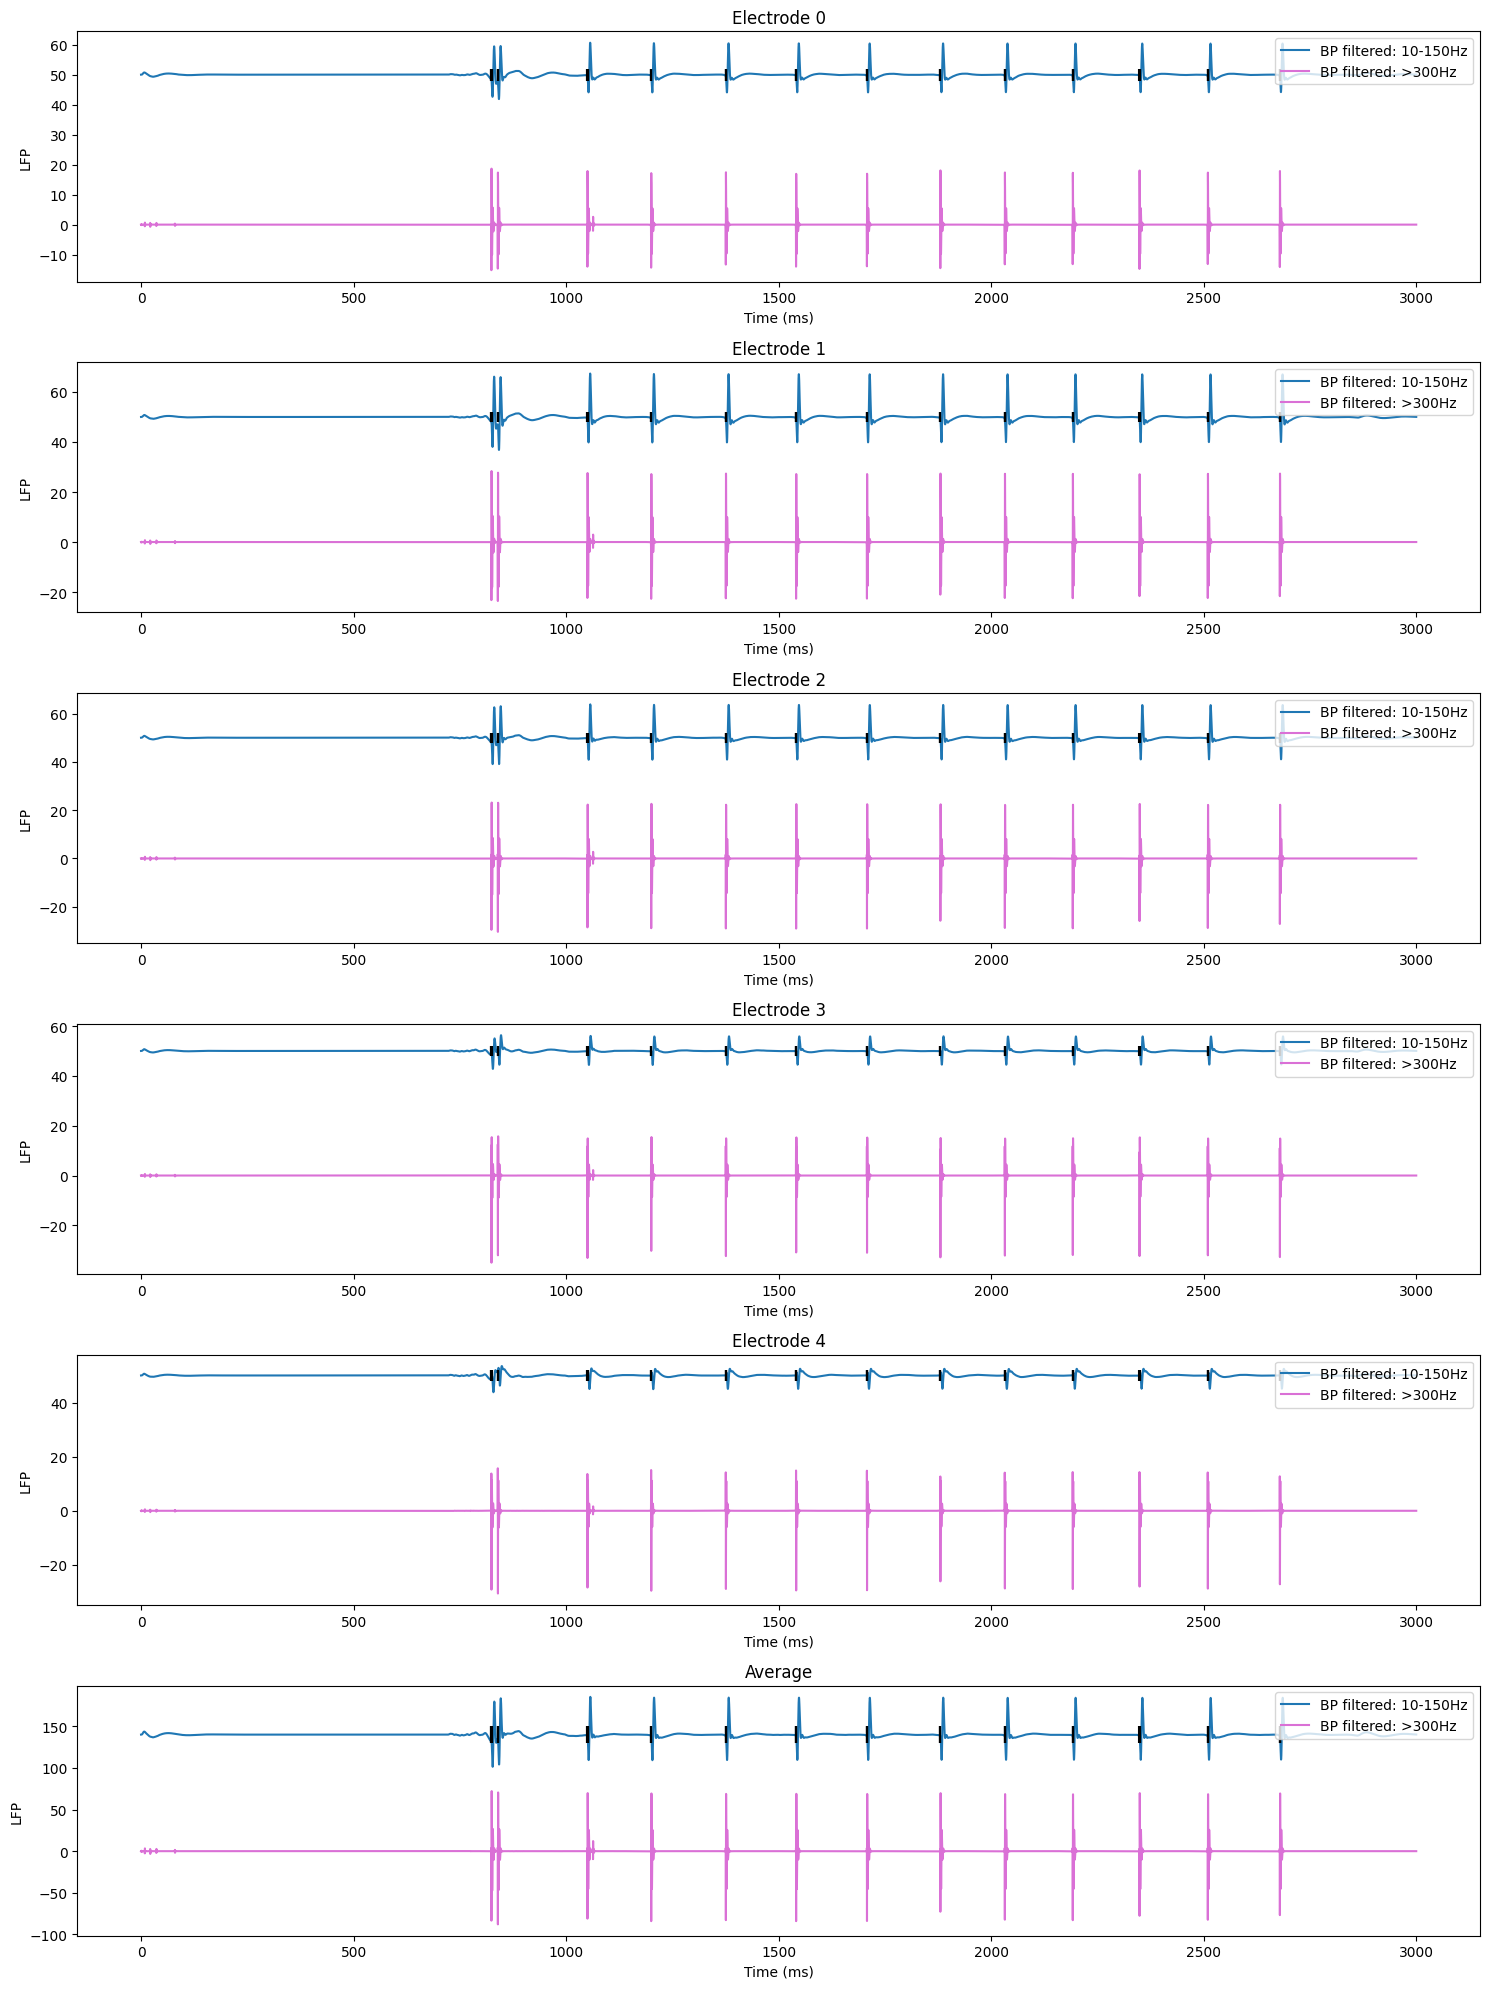

In [8]:
%matplotlib inline
t = list(simData['t'])
dt = 0.1
depths = 5

lfp_lowcut = 10
lfp_highcut = 150
spikes_lowcut = 300
spikes_highcut = 3000
fs = 1/dt*1000

fig, axs = plt.subplots(depths+1, 1, figsize=(15,20))
axs.ravel()

shift = 50
for i in range(0,depths):

    lfp = simData['LFP'][:,i]
    lfp_bp_low = butter_bandpass_filter(lfp, lfp_lowcut, lfp_highcut, fs, order=4)
    lfp_bp_spikes = butter_bandpass_filter(lfp, spikes_lowcut, spikes_highcut, fs, order=4)

    axs[i].plot(t[0:len(lfp_bp_low)],lfp_bp_low*10000+shift,label=f'BP filtered: {lfp_lowcut}-{lfp_highcut}Hz')
    axs[i].plot(t[0:len(lfp_bp_spikes)],lfp_bp_spikes*10000,color='orchid',label=f'BP filtered: >{spikes_lowcut}Hz')
    axs[i].vlines(t_spikes, [shift-2], [shift+2], 'k')
    axs[i].legend(loc='upper right')     
    axs[i].set_title(f'Electrode {i}')
    # ax[i].set_yticks([])
    axs[i].set_xlabel('Time (ms)')
    axs[i].set_ylabel('LFP') 

avg_shift = 140
avg_lfp = np.sum(simData['LFP'],axis=1)
avg_lfp_bp_low = butter_bandpass_filter(avg_lfp, lfp_lowcut, lfp_highcut, fs, order=4)
avg_lfp_bp_spikes = butter_bandpass_filter(avg_lfp, spikes_lowcut, spikes_highcut, fs, order=4)
axs[-1].plot(t[0:len(avg_lfp_bp_low)],avg_lfp_bp_low*10000+avg_shift,label=f'BP filtered: {lfp_lowcut}-{lfp_highcut}Hz')
axs[-1].plot(t[0:len(avg_lfp_bp_spikes)],avg_lfp_bp_spikes*10000,color='orchid',label=f'BP filtered: >{spikes_lowcut}Hz')
axs[-1].vlines(t_spikes, [avg_shift-10], [avg_shift+10], 'k')
axs[-1].legend(loc='upper right')     
axs[-1].set_title(f'Average')
# ax[-1].set_yticks([])
axs[-1].set_xlabel('Time (ms)')
axs[-1].set_ylabel('LFP') 


# fig.suptitle('LFPs')
fig.tight_layout()
fig.savefig(os.path.join(output_dir,'lfps-all_electrodes.png'),bbox_inches='tight',dpi=300)

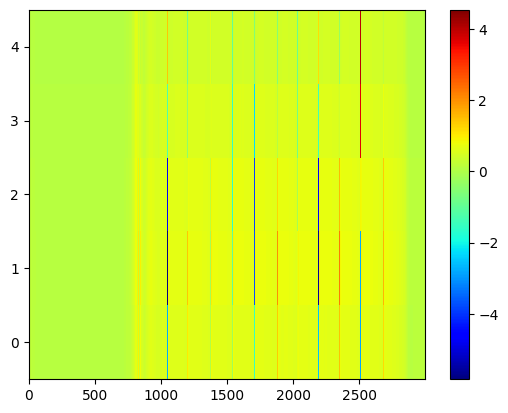

In [9]:
# plt.contourf(t[0:lfp.shape[0]],range(0,depths),simData['LFP'].transpose(),256,cmap='jet')
plt.pcolormesh(t[0:lfp.shape[0]],range(0,depths),simData['LFP'].transpose()*1000,cmap='jet')
plt.colorbar()
# plt.vlines(t_spikes, [1.5], [2], 'k')

### ??

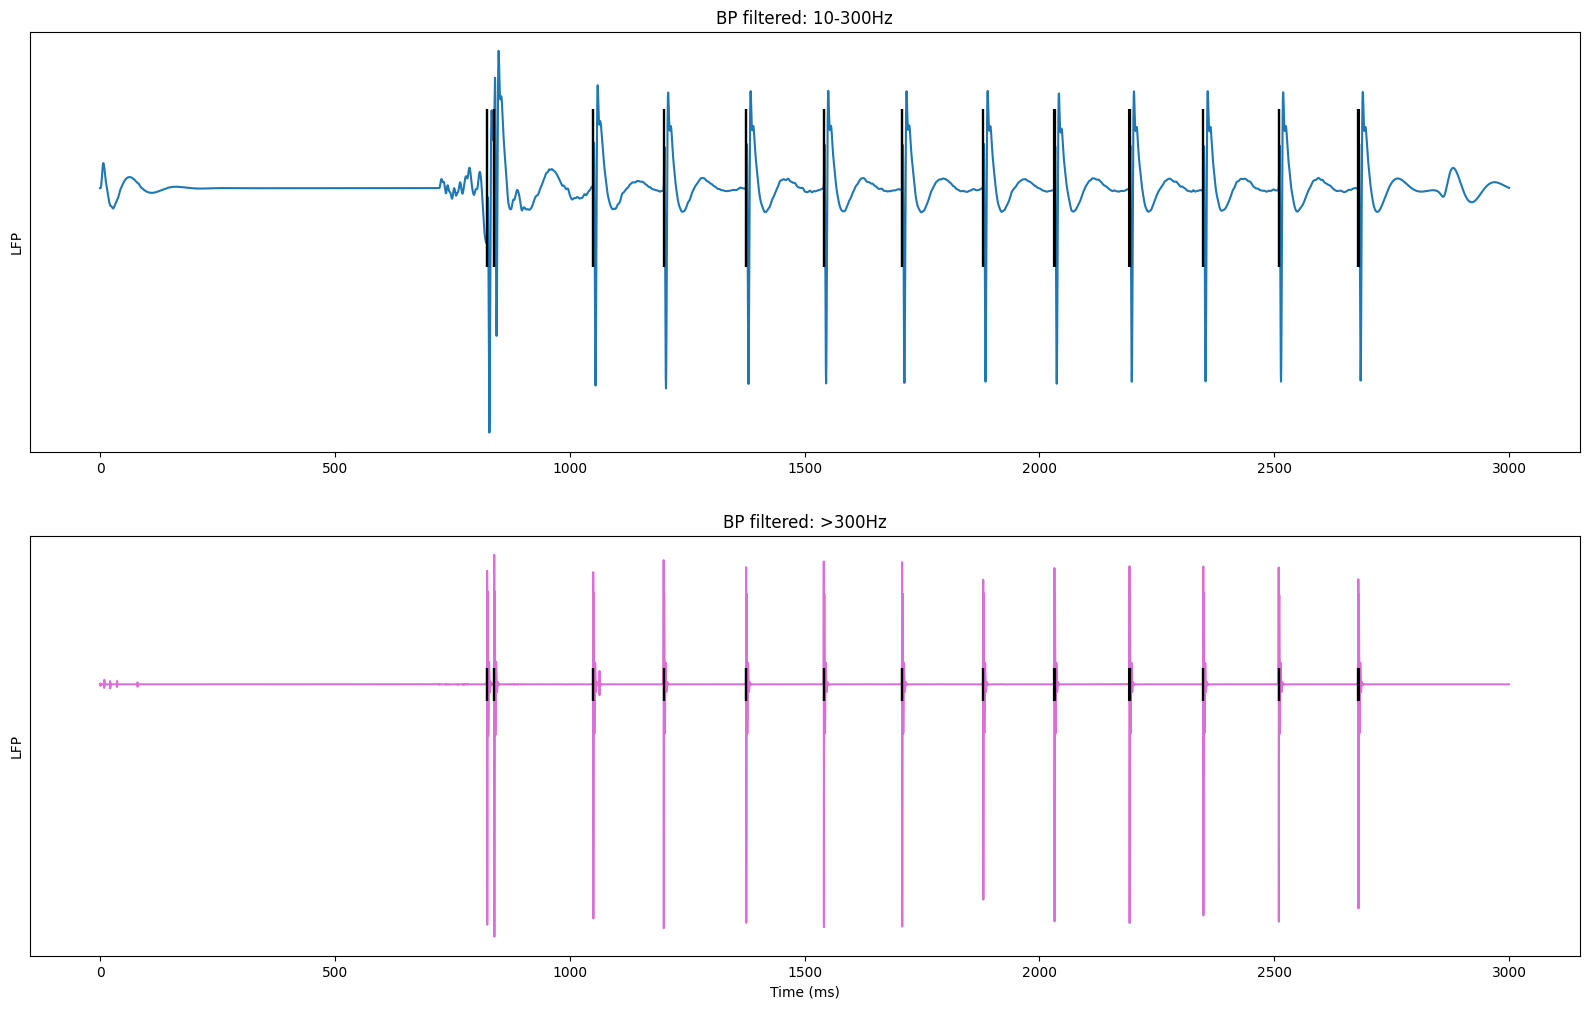

In [10]:
%matplotlib inline
fig, axs = plt.subplots(2, 1, figsize=(20,12))
axs.ravel()

axs[0].plot(t[0:len(lfp_bp_low)],lfp_bp_low*10000,label='BP filtered: 10-300Hz')
axs[0].vlines(t_spikes, [-2], [2], 'k')
axs[0].set_yticks([])
axs[0].set_title('BP filtered: 10-300Hz')
axs[0].set_ylabel('LFP')      

axs[1].plot(t[0:len(lfp_bp_spikes)],lfp_bp_spikes*10000,color='orchid',label='BP filtered: >300Hz')
axs[1].vlines(t_spikes, [-2], [2], 'k')
# ax.legend(loc='upper right')     
axs[1].set_title('BP filtered: >300Hz')
axs[1].set_yticks([])
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('LFP')      
# ax.set_title('LFPs')
# fig.show()
fig.savefig(os.path.join(output_dir,'lfps-order_4.png'),bbox_inches='tight',dpi=300)

In [11]:

### Signal processing ###
def butter_bandpass(lowcut, highcut, fs, order=5):
 nyq = 0.5 * fs
 low = lowcut / nyq
 high = highcut / nyq
 b, a = butter(order, [low, high], btype='band')
 return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
   b, a = butter_bandpass(lowcut, highcut, fs, order=order)
   y = lfilter(b, a, data)
   return y

In [12]:
lfp = [lfp_d[0] for lfp_d in simData['LFP']]
lfp_bp_low = butter_bandpass_filter(lfp, 10, 300, 1/0.1*1000, order=4)

lfp_bp_spikes = butter_bandpass_filter(lfp, 301, 700, 1/0.1*1000, order=4)

In [13]:
1/0.01*100

10000.0

In [14]:
def plot_lfp(t, lfp, t_spikes, dt, output_dir):
    # t = list(simData['t'])
    # spkt = list(simData['spkt'])
    # # lfp_0 = [lfp_d[0] for lfp_d in simData['LFP'][:,0]]
    # lfp = simData['LFP'][:,0]

    lfp_bp_low = butter_bandpass_filter(lfp, 10, 300, 1/dt*1000, order=4)
    lfp_bp_spikes = butter_bandpass_filter(lfp, 301, 700, 1/dt*1000, order=4)

    fig, ax = plt.subplots(2, 1, figsize=(20,12))
    ax.ravel()

    ax[0].plot(t[0:len(lfp_bp_low)],lfp_bp_low*10000,label='BP filtered: 10-300Hz')
    ax[0].vlines(t_spikes, [-2], [2], 'k')
    ax[0].set_yticks([])
    ax[0].set_title('BP filtered: 10-300Hz')
    ax[0].set_ylabel('LFP')      

    ax[1].plot(t[0:len(lfp_bp_spikes)],lfp_bp_spikes*10000,color='orchid',label='BP filtered: >300Hz')
    ax[1].vlines(t_spikes, [-2], [2], 'k')
    # ax.legend(loc='upper right')     
    ax[1].set_title('BP filtered: >300Hz')
    ax[1].set_yticks([])
    ax[1].set_xlabel('Time (ms)')
    ax[1].set_ylabel('LFP')   
    # fig.show()   

    return fig

    # fig.savefig(os.path.join(output_dir,'lfp_fig.png'),bbox_inches='tight',dpi=300)

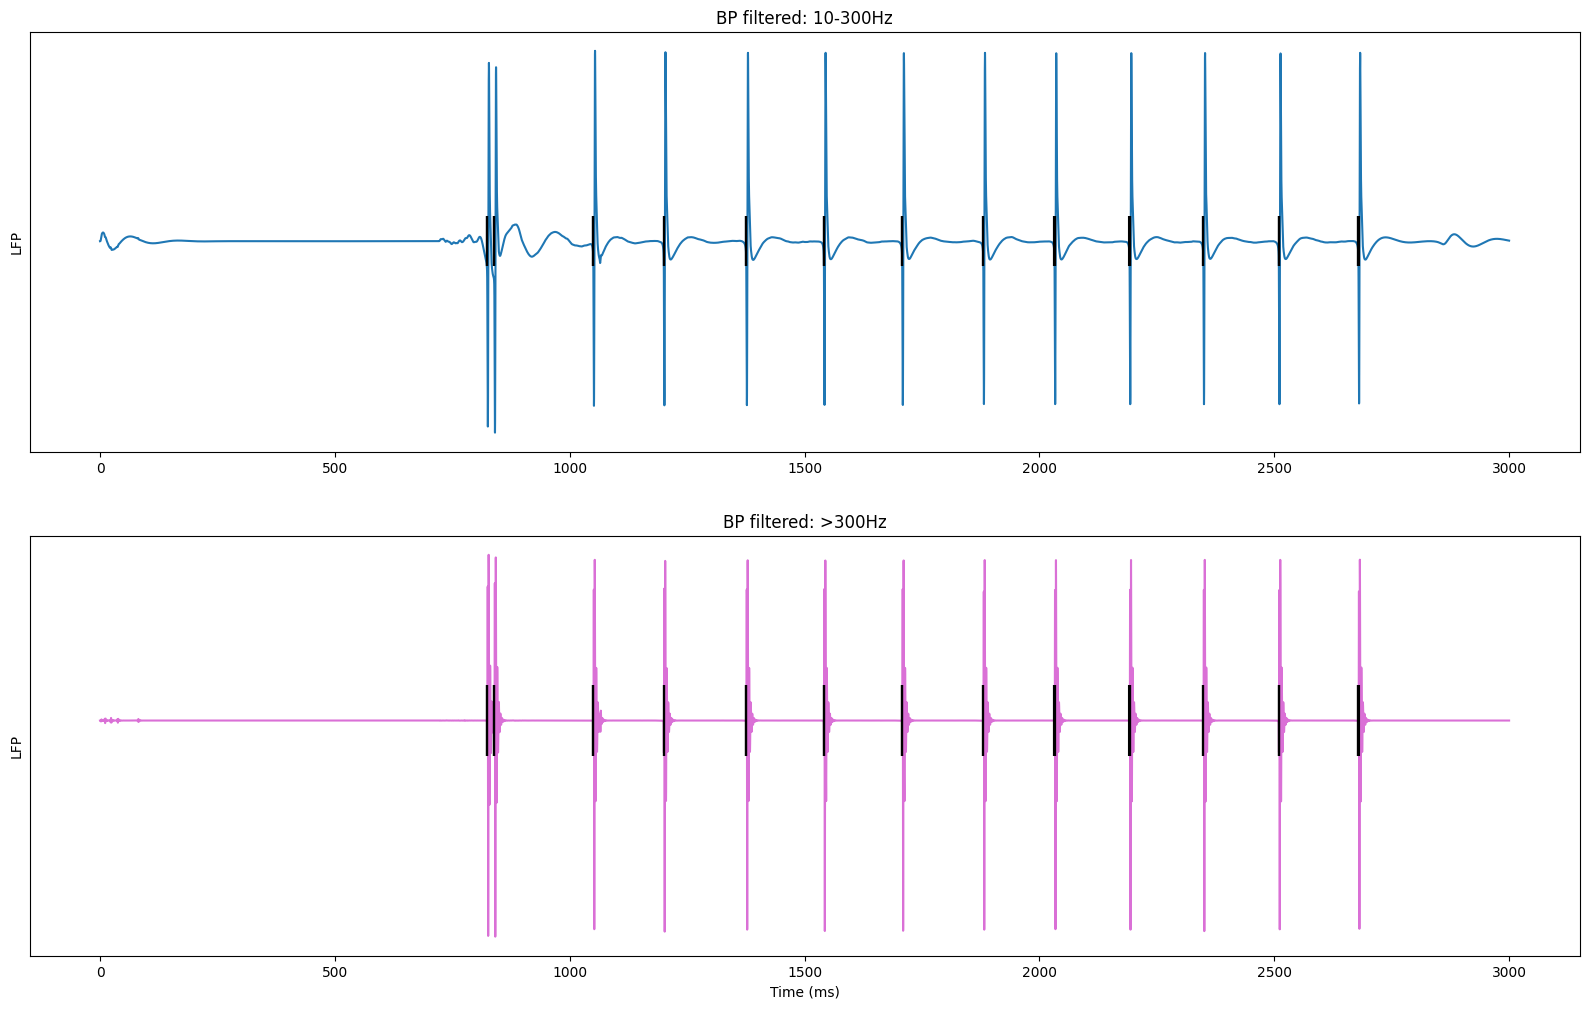

In [15]:
fig = plot_lfp(list(simData['t']), simData['LFP'][:,0],t_spikes,0.1,output_dir)
fig.show()

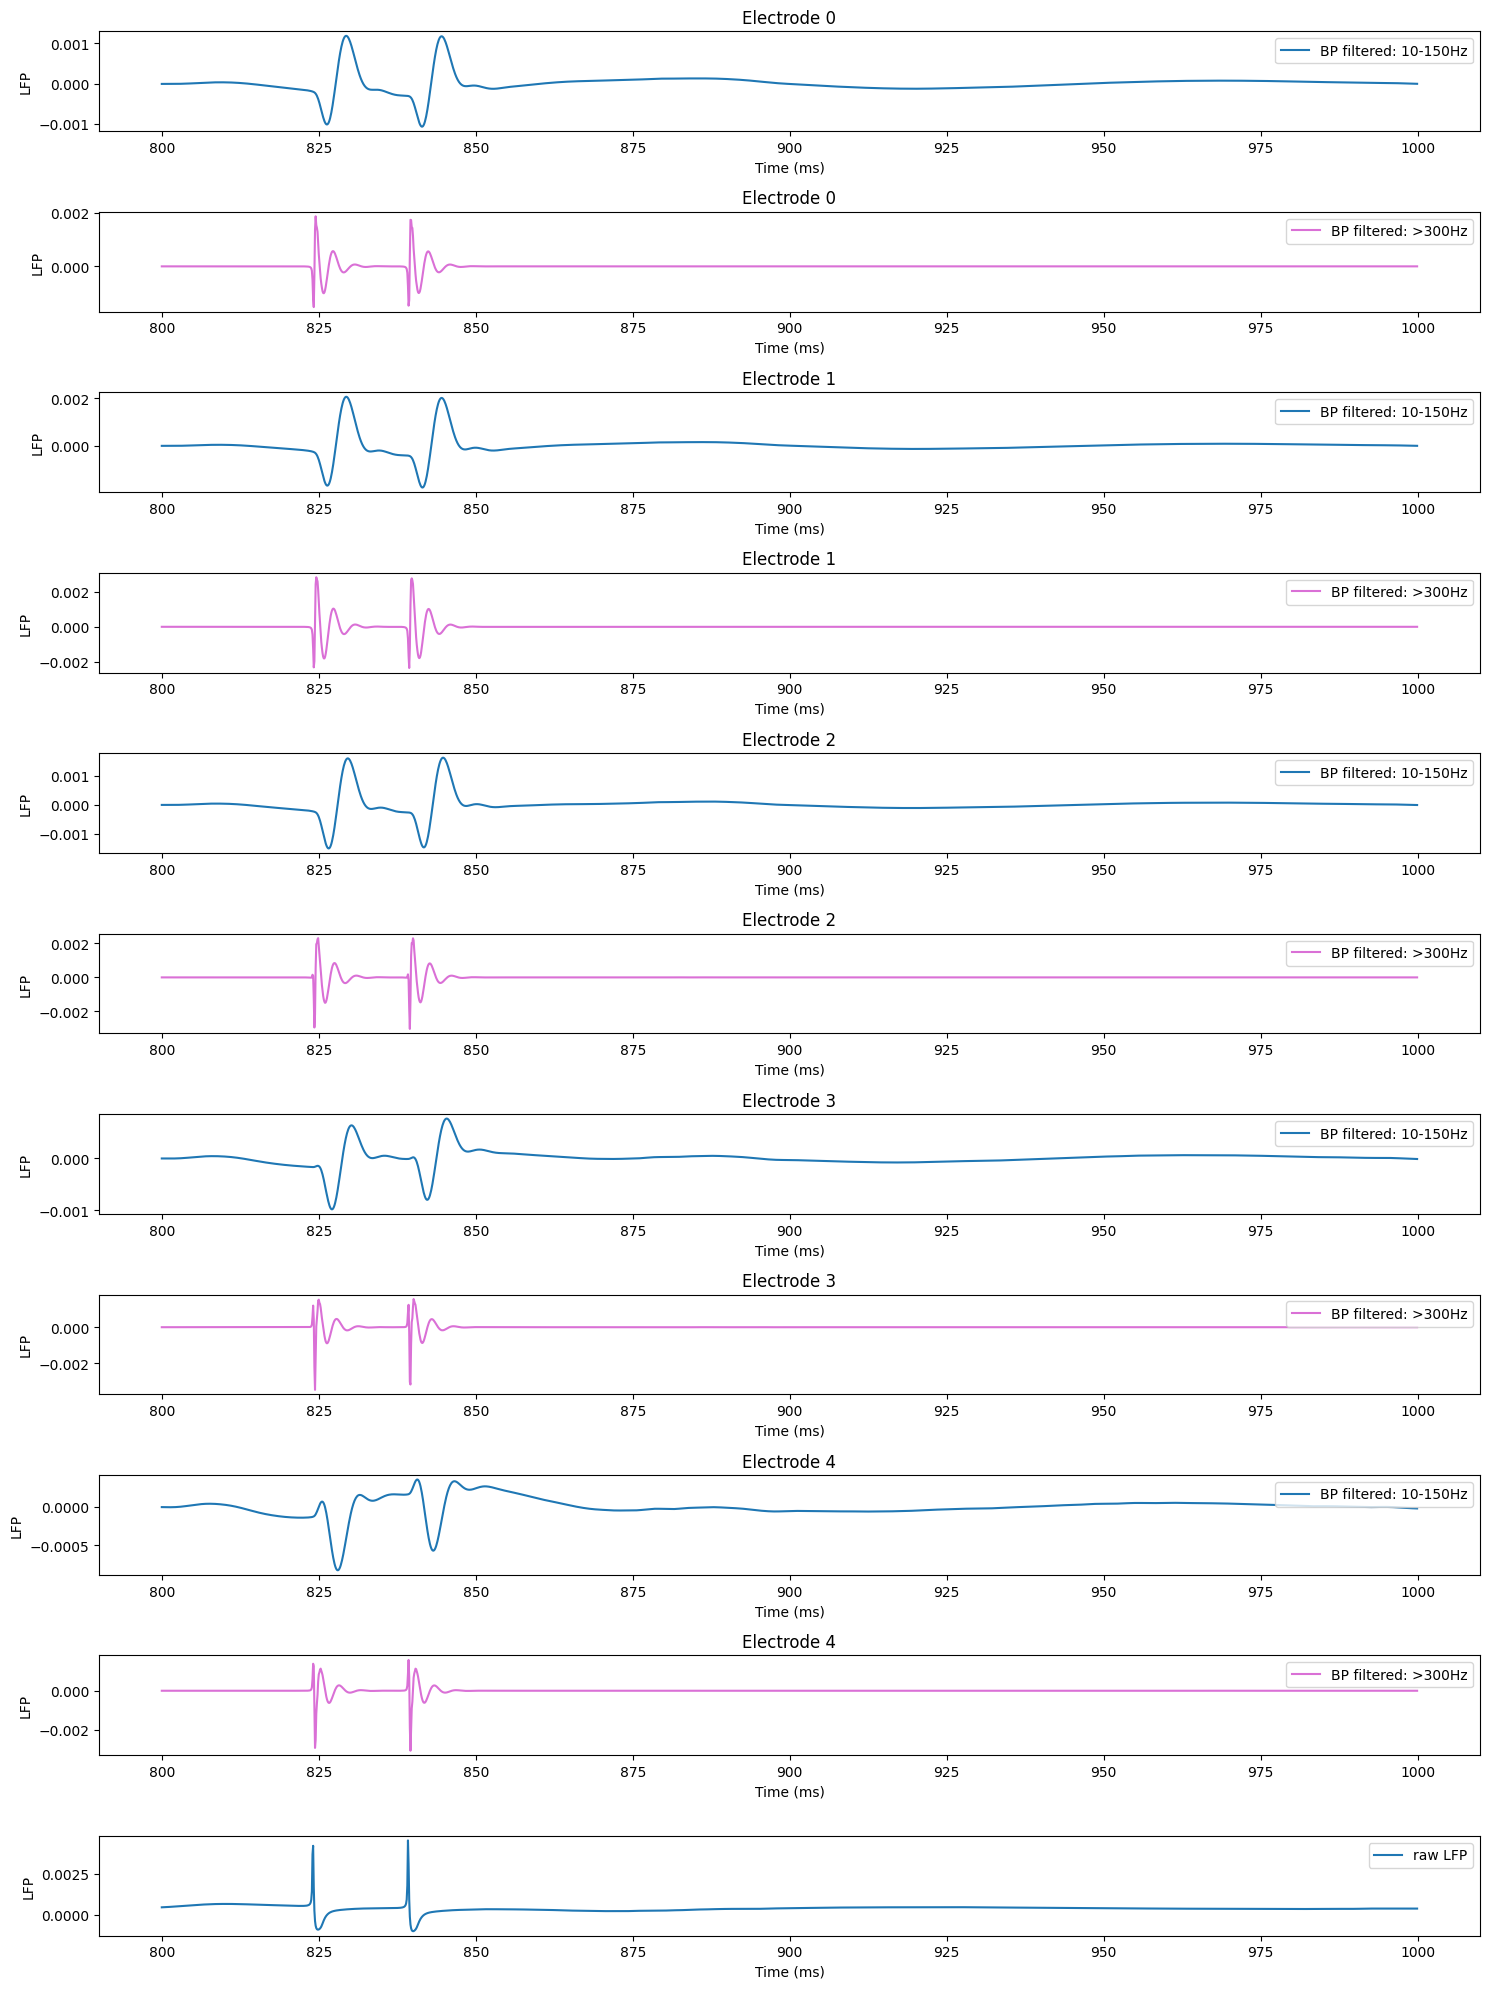

In [27]:
%matplotlib inline
t = list(simData['t'])
dt = 0.1
depths = 5

fig, axs = plt.subplots((depths*2)+1, 1, figsize=(15,20))
axs.ravel()

for i in range(0,depths):

    lfp = simData['LFP'][:,i]
    lfp_lims = [10,200]
    spike_lims = [300,3000]
    lfp_bp_low = butter_bandpass_filter(lfp, lfp_lims[0], lfp_lims[1], 1/dt*1000, order=4)
    lfp_bp_spikes = butter_bandpass_filter(lfp, spike_lims[0], spike_lims[1], 1/dt*1000, order=4)

    axs[i*2].plot(t[8000:10000],lfp_bp_low[8000:10000],label=f'BP filtered: 10-150Hz')
    axs[i*2+1].plot(t[8000:10000],lfp_bp_spikes[8000:10000],color='orchid',label='BP filtered: >300Hz')
    # ax[i].vlines(t_spikes, [35], [45], 'k')

    axs[i*2].set_title(f'Electrode {i}')
    axs[i*2+1].set_title(f'Electrode {i}')

axs[-1].plot(t[8000:10000],lfp[8000:10000],label='raw LFP')

for ax in axs:
    ax.legend(loc='upper right')     
    # ax[i].set_yticks([])
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('LFP') 

# avg_lfp = np.sum(simData['LFP'],axis=1)
# avg_lfp_bp_low = butter_bandpass_filter(avg_lfp, 10, 300, 1/dt*1000, order=4)
# avg_lfp_bp_spikes = butter_bandpass_filter(avg_lfp, 300, 500, 1/dt*1000, order=4)
# ax[-1].plot(t[0:len(avg_lfp_bp_low)],avg_lfp_bp_low*10000+40,label='BP filtered: 10-300Hz')
# ax[-1].plot(t[0:len(avg_lfp_bp_spikes)],avg_lfp_bp_spikes*10000,color='orchid',label='BP filtered: >300Hz')
# # ax[-1].vlines(t_spikes, [30], [50], 'k')
# ax[-1].legend(loc='upper right')     
# ax[-1].set_title(f'Average')
# ax[-1].set_yticks([])
# ax[-1].set_xlabel('Time (ms)')
# ax[-1].set_ylabel('LFP') 

# fig.suptitle('LFPs')
fig.tight_layout()

In [17]:
lfp = simData['LFP']
lfp.shape[0]
lfp.transpose().shape

(5, 30000)

In [18]:
wavelet="cgau5"
scale_low=3     # 140 Hz
scale_high=32   # 20 Hz

scales = np.linspace(scale_low/dt, scale_high/dt, 50)     
cfs, frequencies = pywt.cwt(lfp_bp_gamma, scales, wavelet, dt / 1000.0)  # was lfp_bp_gamma
lfp_wavelet_power = np.log(1+abs(cfs))

NameError: name 'lfp_bp_gamma' is not defined

In [ ]:
np.min(lfp)*1000

-5.835938661764073

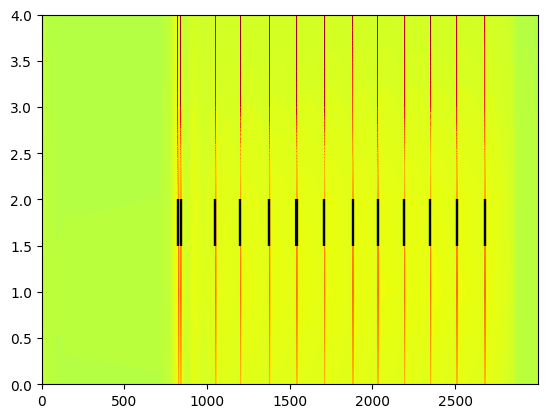

In [ ]:
plt.contourf(t[0:lfp.shape[0]],range(0,depths),simData['LFP'].transpose(),256,cmap='jet')
plt.vlines(t_spikes, [1.5], [2], 'k')

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
 nyq = 0.5 * fs
 low = lowcut / nyq
 high = highcut / nyq
 b, a = butter(order, [low, high], btype='band')
 return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
   b, a = butter_bandpass(lowcut, highcut, fs, order=order)
   y = lfilter(b, a, data)
   return y

# lfp_bp_low = butter_bandpass_filter(lfp, 10, 300, 1/0.1*1000, order=4)
# lfp_bp_spikes = butter_bandpass_filter(lfp, 301, 700, 1/0.1*1000, order=4)